In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rc('figure', figsize=(10, 6))

## 1 USA.gov Data from Bitly

In [2]:
path = 'datasets/bitly_usagov/example.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json

In [5]:
records = [json.loads(line) for line in open(path)]

In [6]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### 1.1 Counting Time Zones in Pure Python

In [23]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [24]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [12]:
def get_counts(sequence):
    """
    Count the number of every unique items in a sequence
    """
    counts = dict()
    for item in sequence:
        counts[item] = counts.get(item, 0) + 1
    return counts

In [13]:
from collections import defaultdict

In [14]:
def get_counts_defaultdict(sequence):
    """
    Using the defaultdict class instead
    """
    counts = defaultdict(int) # values will initialize to 0
    for item in sequence:
        counts[item] += 1
    return counts

In [15]:
%time counts_1 = get_counts(time_zones)

CPU times: user 3.48 ms, sys: 1.35 ms, total: 4.83 ms
Wall time: 3.79 ms


In [16]:
%time counts_2 = get_counts_defaultdict(time_zones)

CPU times: user 2.3 ms, sys: 1.07 ms, total: 3.37 ms
Wall time: 2.54 ms


In [25]:
counts = get_counts_defaultdict(time_zones)

Geting the top 10 time zones and their counts

In [42]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) 
                       for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:10]

In [43]:
top_counts(counts)

[(1251, u'America/New_York'),
 (521, u''),
 (400, u'America/Chicago'),
 (382, u'America/Los_Angeles'),
 (191, u'America/Denver'),
 (74, u'Europe/London'),
 (37, u'Asia/Tokyo'),
 (36, u'Pacific/Honolulu'),
 (35, u'Europe/Madrid'),
 (33, u'America/Sao_Paulo')]

Using the `collections.Counter` instead

In [44]:
from collections import Counter

In [45]:
counts = Counter(time_zones)

In [46]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

In [47]:
?counts

### 1.2 Counting Time Zones with pandas

Creating a DataFrame from the original set of records

In [50]:
frame = pd.DataFrame(records)

In [51]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [54]:
tz_counts = frame['tz'].value_counts()

In [56]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

Repalce the missing values with 'Missing', the empty strings with 'Unknown'

In [57]:
clean_tz = frame['tz'].fillna('Missing')

In [58]:
clean_tz[clean_tz == ''] = 'Unknown'

In [59]:
tz_counts = clean_tz.value_counts()

In [60]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

Make a horizontal bar plot

In [64]:
subset = tz_counts[:10]

In [74]:
sns.barplot(y=subset.index, x=subset.values)

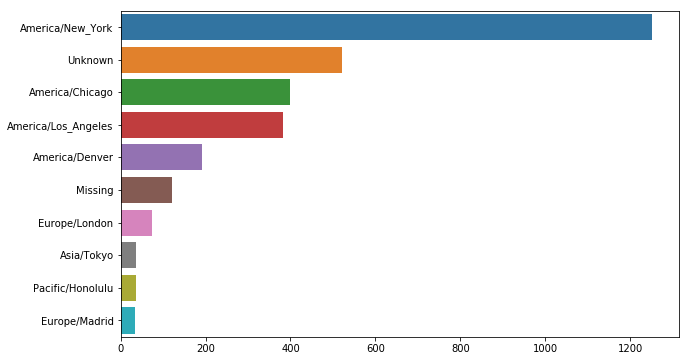

In [75]:
plt.show()

The `a` field contains information about the browser, device, or application used to perform the URL shortening

In [76]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [77]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [78]:
frame['a'][51][:50]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

Split the string and make summary of them one by one

In [79]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [80]:
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [81]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

Exclude the rows whose agents are missing

In [85]:
cframe = frame[frame.a.notnull()]

Compute a value for wheter each row is Windows or not

In [91]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [93]:
cframe['os'].head()

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

Group the data by its time zone column and os column

In [94]:
by_tz_os = cframe.groupby(['tz', 'os'])

Use the `size` method to compute the group size

In [97]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [98]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [100]:
pd.crosstab(cframe.tz, cframe.os)[:10]

os,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


Select the top overall time zones. To do so, I construct an indirect index array from the row counts in agg_counts. The `argsort` method return a new sorted series with values indicating their row positions in source series

In [106]:
indexer = agg_counts.sum(1).argsort()

In [107]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

Use `take` to select the rows in that order

In [120]:
count_subset = agg_counts.take(indexer[-10:])

In [121]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [110]:
indexer['America/New_York']

84

pandas has a convenient method called `nlargest` that does the same thing

In [115]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Make a stacked bar plot

In [122]:
test = count_subset.copy()

In [123]:
count_subset = count_subset.stack()

In [124]:
count_subset.name = 'total'

In [125]:
count_subset = count_subset.reset_index()

In [126]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


In [129]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

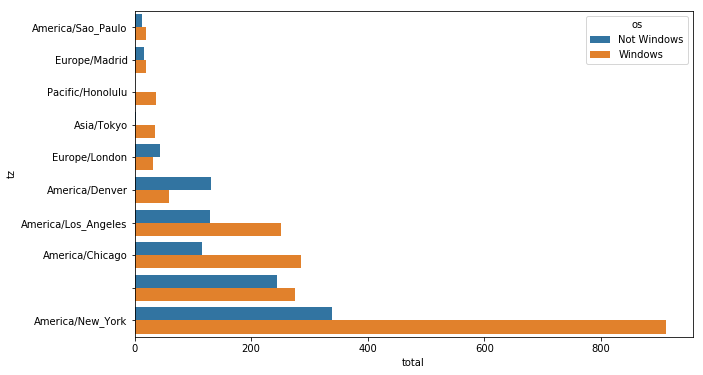

In [130]:
plt.show()

Normalize the group percentages to sum to 1

In [132]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [133]:
results = count_subset.groupby('tz').apply(norm_total)

In [136]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

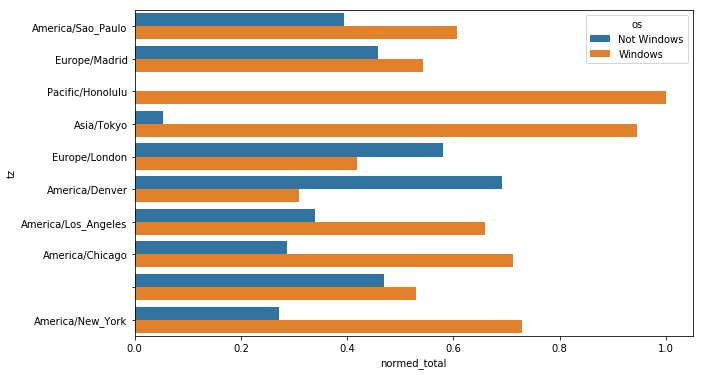

In [137]:
plt.show()

In [147]:
g = count_subset.groupby('tz')

In [155]:
g.total

## 2 MovieLens 1M Dataset

In [11]:
!head -10 datasets/movielens/users.dat

1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455
6::F::50::9::55117
7::M::35::1::06810
8::M::25::12::11413
9::M::25::17::61614
10::F::35::1::95370


In [14]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

In [15]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

In [16]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

In [17]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip           6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [20]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [21]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [22]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [24]:
data = pd.merge(pd.merge(ratings, movies), users)

In [25]:
data.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


Compute mean ratings for each movie grouped by gender

In [26]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender',
                                aggfunc='mean')

In [31]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [34]:
mean_ratings_2 = data.groupby(['title', 'gender'])['rating'].mean().unstack()

In [35]:
mean_ratings_2.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


Filter down to movies that received at least 250 ratings

In [40]:
ratings_by_title = data.groupby('title').size()

In [42]:
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [43]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [44]:
mean_ratings = mean_ratings.loc[active_titles]

In [45]:
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [47]:
mean_ratings_2[ratings_by_title >= 250].head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers

In [48]:
?mean_ratings.sort_values

In [51]:
top_female_ratings = mean_ratings.sort_values('F', ascending=False)

In [52]:
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### 2.1 Measuring Rating Disagreement

Find the movies that are most divisive between male and female viewers

In [53]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [54]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [55]:
sorted_by_diff.head(10)

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Find the movies that elicited the most disagreement among viewers, independent of gender identification

In [61]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [63]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [66]:
rating_std_by_title.sort_values(ascending=False).head(10)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 3 US Baby Names 1880-2010

In [67]:
!head -n 10 datasets/babynames/yob1880.txt

In [69]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])

In [70]:
names1880.head(10)

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


The total number of births in the year

In [71]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Assemble all of the data into a single DataFrame

In [6]:
years = range(1880, 2011)
pieces = list()
columns = ['name', 'sex', 'birth']

In [7]:
for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [8]:
names = pd.concat(pieces, ignore_index=True)

In [9]:
names.head()

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Compute total birth for each years group by gender

In [10]:
total_births = names.pivot_table('birth', index='year', columns='sex',
                                 aggfunc=sum)

In [11]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [12]:
total_births.plot(title='Total births by sex and year')

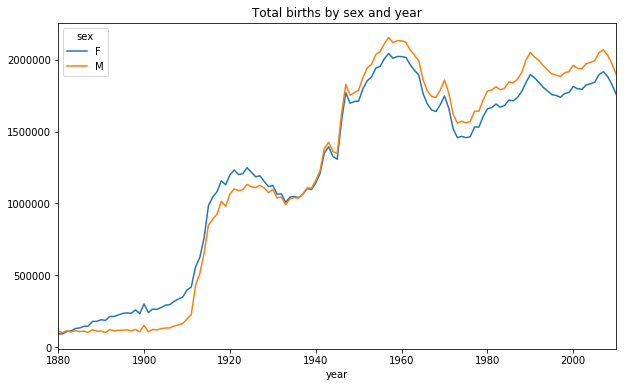

In [13]:
plt.show()

Insert a column prop with the fraction of babies given each name relative to the total number of births

In [15]:
names['prop'] = (names.groupby(['year', 'sex']).birth
                 .apply(lambda group: group / group.sum()))

In [16]:
names.head()

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Verify that the prop column sums to 1 within all the groups

In [17]:
names.groupby(['year', 'sex']).prop.sum().head()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

Extract the top 1000 names for each sex/year combination

In [19]:
def get_top1000(group):
    return group.sort_values('birth', ascending=False)[:1000]

In [21]:
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [22]:
top1000.head(10)

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### 3.1 Analyzing Naming Trends

Spliting the To 1000 names into the boy and girl portion

In [23]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

Form a pivot table of the total number of births by year and name. And plot a simple time series, like the number of Johns or Marys for eahc year

In [26]:
total_births = top1000.pivot_table('birth', columns='name', index='year',
                                  aggfunc=sum)

In [27]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

In [28]:
subset.plot(subplots=True, grid=False, title='Number of births per year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f8d47d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11d4c7150>], dtype=object)

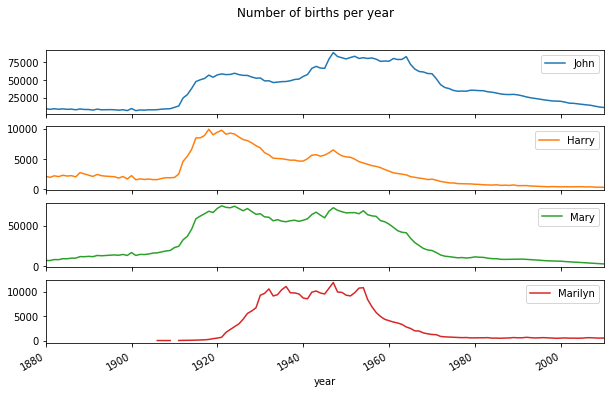

In [29]:
plt.show()

***Measuring the increase in naming diversity***

The decrease in plots is that fewer parents are choosing common names for their children

Compute the sum of the proportion of births represented by the top 1000 most popular names

In [31]:
table = top1000.pivot_table('prop', index='year', columns='sex',
                            aggfunc=sum)

In [32]:
table.plot(title='Sum of table1000.prob by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

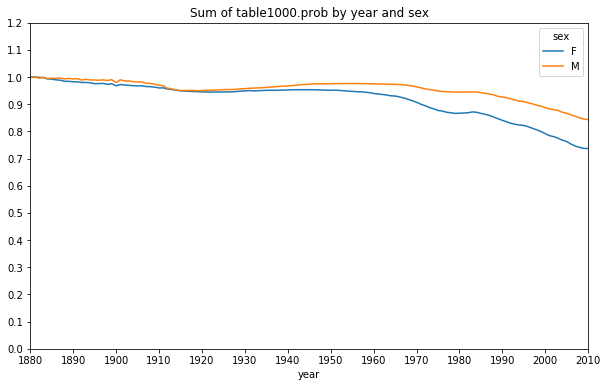

In [33]:
plt.show()

Compute the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births

In [80]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [68]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [83]:
diversity = diversity.unstack()

In [84]:
diversity.plot(title='Number of popular names in top 50%')

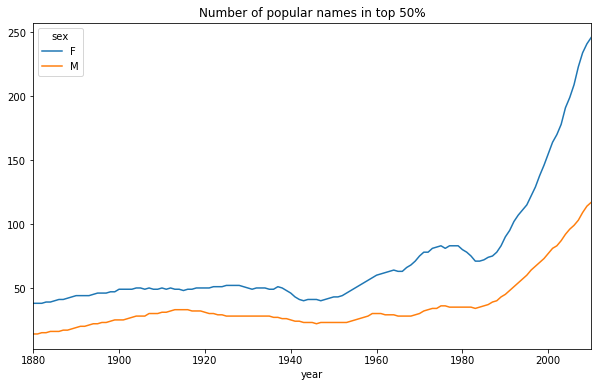

In [85]:
plt.show()

***The "last letter" revolution***

Aggregate all of the births in the full dataset by year, sex and final letter

In [98]:
get_last_letter = lambda x: x[-1]

In [99]:
last_letters = names.name.map(get_last_letter)

In [100]:
last_letters.name = 'last_letter'

In [102]:
table = names.pivot_table('birth', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)

Select out three representative years spanning the history

In [135]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [136]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

Normalize the table by total births to compute a new table containing proportion of total births for each sex ending in each letter

In [137]:
letter_prop = subtable / subtable.sum()

In [138]:
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

Make barplots for each sex broken down by year

In [146]:
fig, axes = plt.subplots(2, 1)

In [147]:
letter_prop['M'].plot(kind='bar', ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', ax=axes[1], title='Female', legend=False)

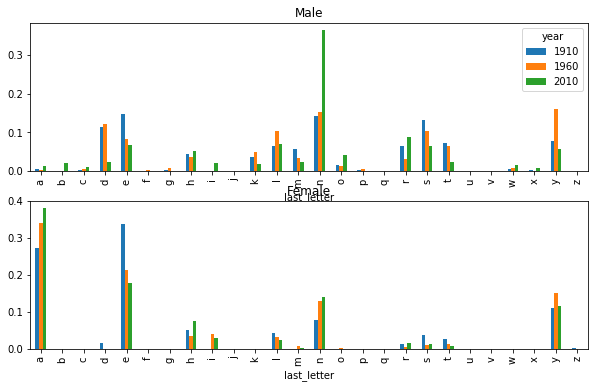

In [148]:
plt.show()

In [149]:
?letter_prop.plot

Normalize the full table by year and sex, and select a subset of letters for boy names

In [150]:
letter_prop = table / table.sum()

In [153]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [154]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


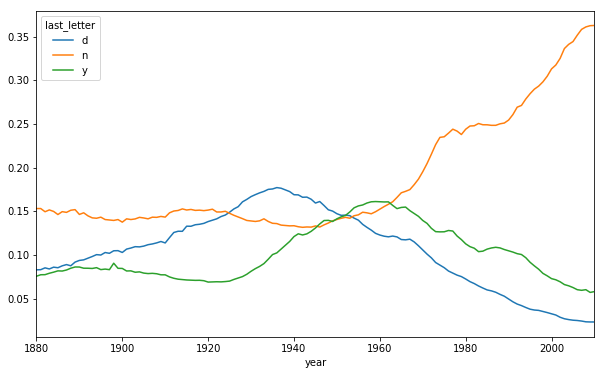

In [155]:
dny_ts.plot()
plt.show()

***Boy names that became girl names (and vice versa)***

Compute a list of names occuring in the top1000 starting with "lesl"

In [156]:
all_names = pd.Series(top1000.name.unique())

In [162]:
lesley_like = all_names[all_names.str.lower().str.startswith('lesl')]

In [163]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

Filter down to just those names and sum births grouped by name

In [165]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [167]:
filtered.groupby('name').birth.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: birth, dtype: int64

Aggregate by sex and year and normalized within year

In [174]:
table = filtered.pivot_table('birth', index='year', columns='sex',
                             aggfunc=sum)

In [175]:
table = table.div(table.sum(1), axis=0)

In [176]:
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [177]:
table.plot(style={'M':'k-', 'F':'k--'})

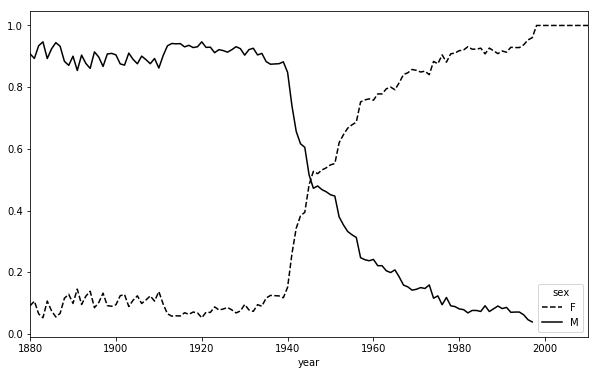

In [178]:
plt.show()

## 4 USDA Food Database

Load json data into Python

In [8]:
import json

In [9]:
db = json.load(open('datasets/usda_food/database.json'))

In [10]:
len(db)

6636

Every entry in db is a dict containing all the data for a single food

In [12]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [13]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [16]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [17]:
nutrients.head()

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00


When converting a list of dicts to a DataFrame, we can specify a list of fields to extract. Extract the food names, group, ID, and manufacturer

In [18]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [19]:
info = pd.DataFrame(db, columns=info_keys)

In [20]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [21]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.4+ KB


The distribution of food groups

In [22]:
info['group'].value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

Convert each list of food nutrients to a DataFrame, add a column for the food `id`, and append the DataFrame to a list. Then cancatenate them together

In [30]:
def extract_nutrients(food):
    nutrients = pd.DataFrame(food['nutrients'])
    nutrients['id'] = food['id']
    return nutrients

In [32]:
nutrients_list = map(extract_nutrients, db)

In [39]:
nutrients = pd.concat(nutrients_list)

In [40]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389355 entries, 0 to 49
Data columns (total 5 columns):
description    389355 non-null object
group          389355 non-null object
units          389355 non-null object
value          389355 non-null float64
id             389355 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.8+ MB


Check duplicates column

In [44]:
nutrients.duplicated().sum()

14179

In [45]:
nutrients = nutrients.drop_duplicates()

Rename group and description columns for clarity since they are in both datasets

In [47]:
col_mapping = {'description': 'food',
               'group': 'fgroup'}

In [48]:
info = info.rename(columns=col_mapping, copy=False)
# copy=false would be faster

In [51]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.4+ KB


In [52]:
col_mapping = {'description': 'nutrient',
               'group': 'nutgroup'}

In [53]:
nutrients = nutrients.rename(columns=col_mapping)

In [63]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 49
Data columns (total 5 columns):
nutrient    375176 non-null object
nutgroup    375176 non-null object
units       375176 non-null object
value       375176 non-null float64
id          375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


Merge info with nutrients

In [64]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [66]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [67]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

Make a plot of median values by food group and nutrient type

In [72]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].median()

In [73]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

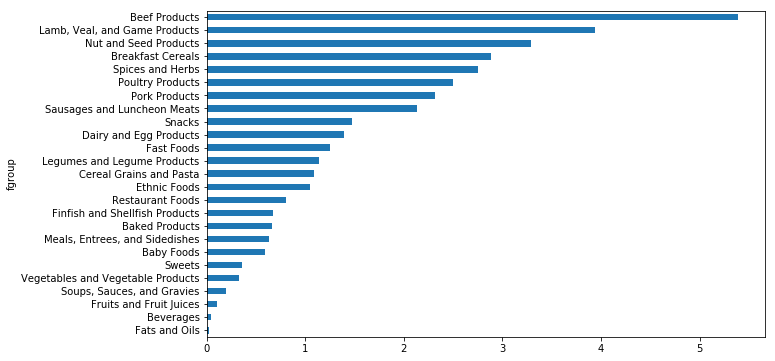

In [74]:
plt.show()

Find which food is most dense in each nutrient

In [75]:
by_nutriet = ndata.groupby(['nutgroup', 'nutrient'])

In [76]:
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

In [77]:
max_foods = by_nutriet.apply(get_maximum)[['value', 'food']]

In [82]:
max_foods.head()

value  \
nutgroup    nutrient                
Amino Acids Alanine         8.009   
            Arginine        7.436   
            Aspartic acid  10.203   
            Cystine         1.307   
            Glutamic acid  17.452   

                                                                   food  
nutgroup    nutrient                                                     
Amino Acids Alanine                   Gelatins, dry powder, unsweetened  
            Arginine                       Seeds, sesame flour, low-fat  
            Aspartic acid                           Soy protein isolate  
            Cystine        Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                           Soy protein isolate

## 5 2012 Federal Election Commission Database

In [6]:
path = '../pydata-book-2nd-edition/datasets/fec/P00000001-ALL.csv'

In [7]:
fec = pd.read_csv(path, low_memory=False)

In [8]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


Add political party affiliations to the data

In [9]:
unique_cands = fec.cand_nm.unique()

In [10]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

Using a dict to indicate party affiliation

In [11]:
parties = {'Bachmann, Michelle': 'Republican',
               'Cain, Herman': 'Republican',
               'Gingrich, Newt': 'Republican',
               'Huntsman, Jon': 'Republican',
               'Johnson, Gary Earl': 'Republican',
               'McCotter, Thaddeus G': 'Republican',
               'Obama, Barack': 'Democrat',
               'Paul, Ron': 'Republican',
               'Pawlenty, Timothy': 'Republican',
               'Perry, Rick': 'Republican',
               "Roemer, Charles E. 'Buddy' III": 'Republican',
               'Romney, Mitt': 'Republican',
               'Santorum, Rick': 'Republican'}

In [12]:
fec['party'] = fec['cand_nm'].map(parties)

In [13]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

Restrict the dataset to positive contributions only

In [14]:
fec = fec[fec.contb_receipt_amt > 0]

Prepare a subset containing only two main candidates

In [15]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### 5.1 Donation Statistics by Occupation and Employer

The total number of donations by occupation

In [17]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

Cleaning up a few occupations

In [18]:
occ_mapping = {
       'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
       'INFORMATION REQUESTED' : 'NOT PROVIDED',
       'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
       'C.E.O.': 'CEO'
}

In [19]:
f = lambda x: occ_mapping.get(x, x)

In [20]:
fec.contbr_occupation = fec.contbr_occupation.map(f)

Cleaning up a few employers name

In [21]:
emp_mapping = {
       'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
       'INFORMATION REQUESTED' : 'NOT PROVIDED',
       'SELF' : 'SELF-EMPLOYED',
       'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [22]:
f = lambda x: emp_mapping.get(x, x)

In [23]:
fec.contbr_employer = fec.contbr_employer.map(f)

Use pivot_table to aggregate the data by party and occupation

In [25]:
by_occupation = fec.pivot_table('contb_receipt_amt', 
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

Filter down to the subset that donated at least $2 million overall

In [26]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [27]:
over_2mm.head(10)

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


Create a bar plot

In [28]:
over_2mm.plot(kind='barh')

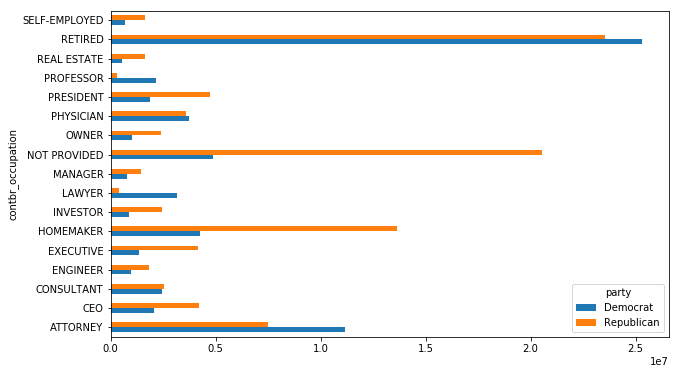

In [29]:
plt.show()

Find the top donor occupations that donated to Obama and Romney

In [33]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [35]:
grouped = fec_mrbo.groupby('cand_nm')

In [36]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [37]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

### 5.2 Bucketing Donation Amounts

Use `cut` function to descretize the contributor amounts into buckets by contribution size

In [40]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])

In [41]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [43]:
labels[:10]

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
416      (10, 100]
417    (100, 1000]
418      (10, 100]
419    (100, 1000]
420      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

Group the data for Obama and Romney by name and bin label to get a hisogram by donation size

In [44]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [45]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


Sum the contribution amounts and normalize within buckets to visualize percentage of total donations of each size by candidate

In [46]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [47]:
normed_sums = bucket_sums.div(bucket_sums.sum(1), axis=0)

In [48]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


In [49]:
normed_sums[:-2].plot(kind='barh')

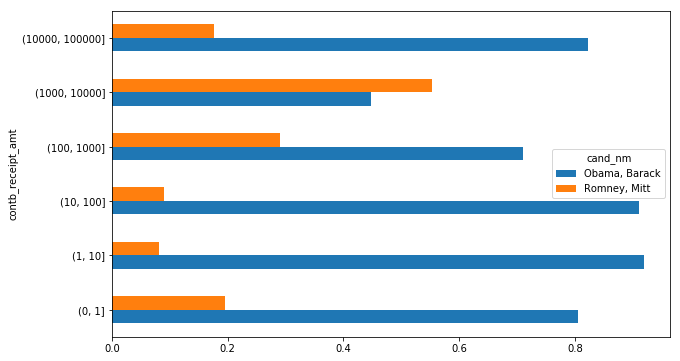

In [50]:
plt.show()

### 5.3 Donation Statistics by State

Aggregating the data by candidate and state

In [51]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [52]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [53]:
totals = totals[totals.sum(1) > 100000]

In [54]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


Divide each row by the total contribution amount to get the relative percentage of total donations by state for each candiate

In [55]:
percent = totals.div(totals.sum(1), axis=0)

In [56]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
